# Assessing feature performance

DWPC = 0.4, computed on a subset of non-indications

In [10]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

In [11]:
auroc_df = pandas.read_table('data/feature-performance/auroc.tsv')
metapath_df = pandas.read_table('data/metapaths.tsv')
metapath_df = metapath_df.rename(columns={'abbreviation': 'metapath'})[['metapath', 'length']]
auroc_df = auroc_df.merge(metapath_df)
auroc_df.head(2)

,metapath,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,length
0,CbG<rG<rGaD,0.63605,0.61395,0.57445,0.84662,0.56577,0.070275,0.000020,4
1,CbG<rG<rGdD,0.58014,0.57085,0.53670,0.38146,0.54954,0.030600,0.000103,4


In [12]:
# auroc_df['delta_permuted_auroc'] = auroc_df.pdwpc_auroc - auroc_df.pdwpc_primary_auroc
# auroc_df.sort_values('pdwpc_primary_auroc', ascending=False)

In [13]:
#auroc_df.sort_values('delta_permuted_auroc', ascending=False)

## Performance by path length

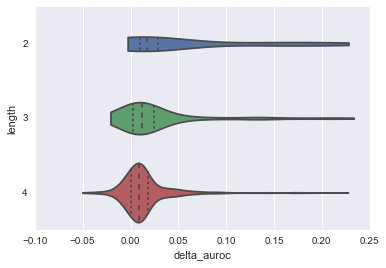

In [14]:
ax = seaborn.violinplot(x='delta_auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

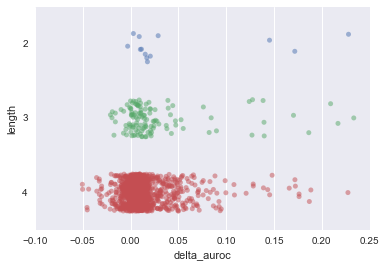

In [15]:
ax = seaborn.stripplot(x='delta_auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha = 0.5)

## Feature AUROC versus non-zero fraction

In [16]:
grid = seaborn.jointplot('nonzero', 'dwpc_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta AUROC versus non-zero fraction

In [17]:
grid = seaborn.jointplot('nonzero', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta-AUROC versus AUROC

In [20]:
grid = seaborn.jointplot('dwpc_auroc', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.apply(lambda x: '{}: {:.1%} nonzero'.format(x['metapath'], x['nonzero']), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Performance by Metaedge

In [21]:
metaedge_df = pandas.read_table('data/metaedge-in-metapath.tsv')
#metaedge_df = metaedge_df.rename(columns={'metapath': 'feature'})
metaedge_df = metaedge_df[['metapath', 'metaedge', 'metaedge_abbrev', 'position']]
metaedge_df = metaedge_df.merge(auroc_df)
metaedge_df.head(2)

,metapath,metaedge,metaedge_abbrev,position,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,length
0,CbGaD,Compound - binds - Gene,CbG,1,0.71284,0.62807,0.66936,0.32238,0.56754,0.1453,6.114000e-07,2
1,CbGaD,Disease - associates - Gene,DaG,2,0.71284,0.62807,0.66936,0.32238,0.56754,0.1453,6.114000e-07,2


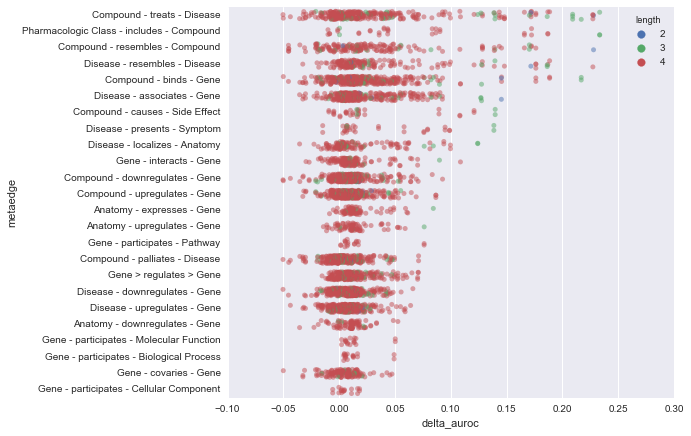

In [22]:
matplotlib.pyplot.figure(figsize=(8, 7))
metasort_df = metaedge_df.sort_values(['delta_auroc', 'metaedge'], ascending=[False, True])
order = metasort_df.drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(
    x='delta_auroc', y='metaedge', data=metasort_df, jitter=0.25,
    hue='length', orient='h', alpha = 0.5, order=order)